<a href="https://colab.research.google.com/github/yaniv256/VAEs-in-Economics/blob/master/Notebooks/Demographic_Data_ATUS_2013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np 

# data
df = pd.read_csv('https://raw.githubusercontent.com/yaniv256/VAEs-in-Economics/master/Data/Timeuse/atussum_2013/atussum_2013.dat')


In [2]:
from keras.utils import to_categorical

#GTMETSTA (Metropolitan Status)
catGTMETSTA = to_categorical(df['GTMETSTA'])

metropolitan = catGTMETSTA[:,1]

print(np.mean(metropolitan))

Using TensorFlow backend.


0.82793146


In [3]:

#PEEDUCA
peeduca = df['PEEDUCA']

peeducaMap = {
  31: 'Less than 1st grade',
  32: '1st, 2nd, 3rd, or 4th grade',
  33: '5th or 6th grade',
  34: '7th or 8th grade',
  35: '9th grade',
  36: '10th grade',
  37: '11th grade',
  38: '12th grade - no diploma',
  39: 'High school graduate - diploma or equivalent (GED)',
  40: 'Some college but no degree',
  41: 'Associate degree - occupational/vocational',
  42: 'Associate degree - academic program',
  43: 'Bachelors degree (BA, AB, BS, etc.)',
  44: 'Masters degree (MA, MS, MEng, MEd, MSW, etc.)',
  45: 'Professional school degree (MD, DDS, DVM, etc.)',
  46: 'Doctoral degree (PhD, EdD, etc.)'
}

mappedPEEDUCA = peeduca.map(peeducaMap)
education = pd.get_dummies(mappedPEEDUCA)
print(np.mean(education))

10th grade                                            0.027668
11th grade                                            0.032675
12th grade - no diploma                               0.014581
1st, 2nd, 3rd, or 4th grade                           0.005446
5th or 6th grade                                      0.012033
7th or 8th grade                                      0.022310
9th grade                                             0.026263
Associate degree - academic program                   0.056302
Associate degree - occupational/vocational            0.041282
Bachelors degree (BA, AB, BS, etc.)                   0.207378
Doctoral degree (PhD, EdD, etc.)                      0.019236
High school graduate - diploma or equivalent (GED)    0.257268
Less than 1st grade                                   0.001669
Masters degree (MA, MS, MEng, MEd, MSW, etc.)         0.094335
Professional school degree (MD, DDS, DVM, etc.)       0.014317
Some college but no degree                            0

In [4]:
# PEHSPNON

hispanic = df['PEHSPNON'] == 1
hispanic = hispanic.astype("float32")
hispanic.name = "Hispanic"
print(np.mean(hispanic))

0.14378568530082703


In [5]:
# PTDTRACE

raceDf = df['PTDTRACE']
raceMap = {
    1: 'White only',
    2: 'Black only',
    3: 'American Indian, Alaskan Native only',
    4: 'Asian only',
    5: 'Hawaiian/Pacific Islander only',
    6: 'White-Black',
    7: 'White-American Indian',
    8: 'White-Asian',
    9: 'White-Hawaiian',
    10: 'Black-American Indian',
    11: 'Black-Asian',
    12: 'Black-Hawaiian',
    13: 'American Indian-Asian',
    14: 'Multi-Race',
    15: 'Multi-Race',
    16: 'Multi-Race',
    17: 'Multi-Race',
    18: 'Multi-Race',
    19: 'Multi-Race',
    20: 'Multi-Race',
    21: 'Multi-Race',
    22: 'Multi-Race',
    23: 'Multi-Race',
    24: 'Multi-Race',
    25: 'Multi-Race',
    26: 'Multi-Race',
}

mappedRace = raceDf.map(raceMap)
race = pd.get_dummies(mappedRace)
print(np.mean(race))
print(race.columns)

American Indian, Alaskan Native only    0.008783
Asian only                              0.037330
Black only                              0.150637
Black-American Indian                   0.000966
Black-Asian                             0.000351
Black-Hawaiian                          0.000088
Hawaiian/Pacific Islander only          0.001845
Multi-Race                              0.000878
White only                              0.788494
White-American Indian                   0.006500
White-Asian                             0.001318
White-Black                             0.002459
White-Hawaiian                          0.000351
dtype: float64
Index(['American Indian, Alaskan Native only', 'Asian only', 'Black only',
       'Black-American Indian', 'Black-Asian', 'Black-Hawaiian',
       'Hawaiian/Pacific Islander only', 'Multi-Race', 'White only',
       'White-American Indian', 'White-Asian', 'White-Black',
       'White-Hawaiian'],
      dtype='object')


            Age
0      0.073574
1      0.341341
2      0.487988
3      0.540541
4      0.454955
...         ...
11380  1.000000
11381  0.719219
11382  0.417417
11383  0.505506
11384  0.360360

[11385 rows x 1 columns]


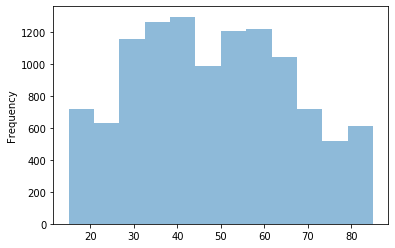

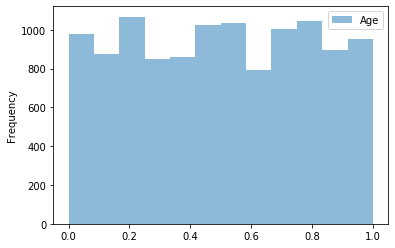

In [6]:
# Age
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt


ageDf = df['TEAGE']
ageDf.plot.hist(bins=12, alpha=0.5)
ageDf = ageDf.values.reshape(-1, 1)
qt_trans = QuantileTransformer(n_quantiles=1000, random_state=0)
age = pd.DataFrame(qt_trans.fit_transform(ageDf))
age.columns = ['Age']
age.plot.hist(bins=12, alpha=0.5)

print(age)


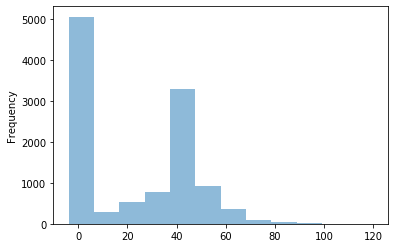

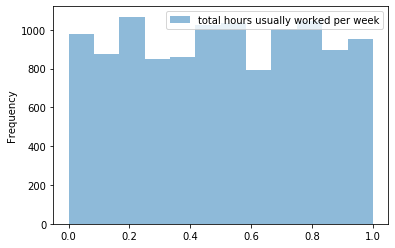

In [7]:
# Hours Worked

hoursWorkedDf = df['TEHRUSLT']
hoursWorkedDf.plot.hist(bins=12, alpha=0.5)
hoursWorkedDf = ageDf.reshape(-1, 1)
qt_trans = QuantileTransformer(n_quantiles=1000, random_state=0)
hoursWorked = pd.DataFrame(qt_trans.fit_transform(hoursWorkedDf))
hoursWorked.columns = ['total hours usually worked per week']
hoursWorked.plot.hist(bins=12, alpha=0.5)

In [8]:
# Employement Status

employementStatusDf = df['TELFS']
employmentStatusMap = {
  1: 'Employed - at work',
  2: 'Employed - absent',
  3: 'Unemployed - on layoff',
  4: 'Unemployed - looking',
  5: 'Not in labor force',
}
mappedES = employementStatusDf.map(employmentStatusMap)
employementStatus = pd.get_dummies(mappedES)
print(np.mean(employementStatus))

Employed - absent         0.025911
Employed - at work        0.573474
Not in labor force        0.348265
Unemployed - looking      0.048134
Unemployed - on layoff    0.004216
dtype: float64


In [9]:
# Work more than one job
mtoJob = df['TEMJOT'] == 1
mtoJob = mtoJob.astype("float32")
mtoJob.name = "in the last seven days did you have more than one job? - yes"
print(np.mean(mtoJob))


0.05243741720914841


In [10]:
# Enrolled in high school, college, or university
enrolledInSchool = df['TESCHENR'] == 1
enrolledInSchool = enrolledInSchool.astype("float32")
enrolledInSchool.name = "Are you enrolled in high school, college, or university? - Yes"
print(np.mean(enrolledInSchool))

0.08739569783210754


In [11]:

whatSchoolDf = df['TESCHLVL']
whatSchoolMap = {
  1: 'High school',
  2: 'College or university',
}
mappedWhatSchool = whatSchoolDf.map(whatSchoolMap)
whatSchool = pd.get_dummies(mappedWhatSchool)
print(np.mean(whatSchool))


College or university    0.050944
High school              0.036451
dtype: float64


In [12]:
# Sex
sexDf = df['TESEX'] == 2
sex = sexDf.astype("float32")
sex.name = "Sex, Female"
print(np.mean(sex))





0.5536231994628906


In [13]:
# Emplyment of spouse
employmentOfSpouseDF = df['TESPEMPNOT'] == 1
employementOfSpouse = employmentOfSpouseDF.astype("float32")
employementOfSpouse.name = "Employement of spouse, employed"
print(np.mean(employementOfSpouse))


0.34325867891311646


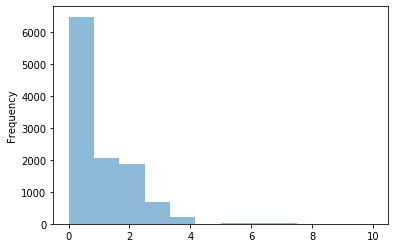

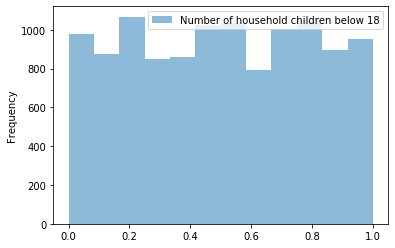

In [14]:
#Number of household children below 18

numOfHHChildren = df['TRCHILDNUM']
numOfHHChildren.plot.hist(bins=12, alpha=0.5)
numOfHHChildren = ageDf.reshape(-1, 1)
qt_trans = QuantileTransformer(n_quantiles=1000, random_state=0)
numOfHHChildren = pd.DataFrame(qt_trans.fit_transform(numOfHHChildren))
numOfHHChildren.columns = ['Number of household children below 18']
numOfHHChildren.plot.hist(bins=12, alpha=0.5)

In [15]:
#Full time or part time employment status of respondent

FulltimeParttime = df['TRDPFTPT']
FulltimeParttimeMap = {
  1: 'Full time',
  2: 'Part time',
}
MappedFulltimeParttime = FulltimeParttime.map(FulltimeParttimeMap)
FulltimeParttime = pd.get_dummies(MappedFulltimeParttime)
print(np.mean(FulltimeParttime))

Full time    0.469829
Part time    0.129556
dtype: float64


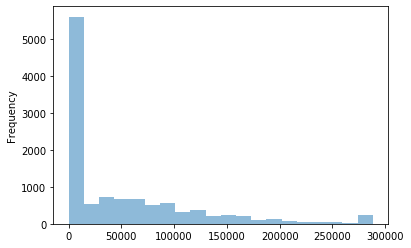

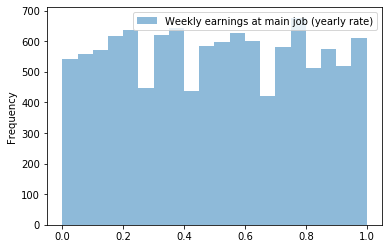

In [16]:
# Weekly earnings at main job (2 implied decimals)

weeklyEarnings = df['TRERNWA']
weeklyEarnings.plot.hist(bins=20, alpha=0.5)
weeklyEarnings = ageDf.reshape(-1, 1)
qt_trans = QuantileTransformer(n_quantiles=1000, random_state=0)
weeklyEarnings = pd.DataFrame(qt_trans.fit_transform(weeklyEarnings))
weeklyEarnings.columns = ['Weekly earnings at main job (yearly rate)']
weeklyEarnings.plot.hist(bins=20, alpha=0.5)


In [17]:
#TRHOLIDAY

# Holiday
Holiday = df['TRHOLIDAY'] == 1
Holiday = Holiday.astype("float32")
Holiday.name = "Holiday"
print(np.mean(Holiday))

0.019499341025948524


In [18]:
#Full time or part time employment status of spouse

FulltimeParttimeSpouse = df['TRSPFTPT']
FulltimeParttimeSpouseMap = {
  1: 'Full time - spouse',
  2: 'Part time - spouse',
}
MappedFulltimeParttimeSpouse = FulltimeParttimeSpouse.map(FulltimeParttimeSpouseMap)
FulltimeParttimeSpouse = pd.get_dummies(MappedFulltimeParttimeSpouse)
print(np.mean(FulltimeParttimeSpouse))

Full time - spouse    0.275889
Part time - spouse    0.053228
dtype: float64


In [19]:
#Presence of the respondent's spouse or unmarried partner in the household

spousePresent = df['TRSPFTPT']
spousePresentMap = {
  1: 'Spouse present',
  2: 'Unmarried partner present',
  3: 'No spouse or unmarried partner present'
}
MappedSpousePresent = spousePresent.map(spousePresentMap)
spousePresent = pd.get_dummies(MappedSpousePresent)
print(np.mean(spousePresent))

No spouse or unmarried partner present    0.014141
Spouse present                            0.275889
Unmarried partner present                 0.053228
dtype: float64


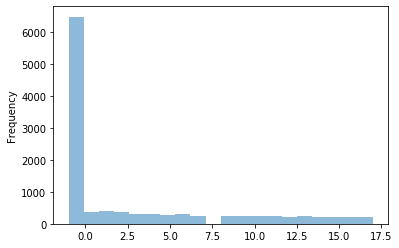

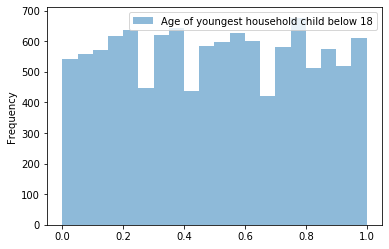

In [20]:
# Age of youngest household child < 18

ageOfYoungest = df['TRYHHCHILD']
ageOfYoungest.plot.hist(bins=20, alpha=0.5)
ageOfYoungest = ageDf.reshape(-1, 1)
qt_trans = QuantileTransformer(n_quantiles=1000, random_state=0)
ageOfYoungest = pd.DataFrame(qt_trans.fit_transform(ageOfYoungest))
ageOfYoungest.columns = ['Age of youngest household child below 18']
ageOfYoungest.plot.hist(bins=20, alpha=0.5)

In [21]:
#TUDIARYDAY

diaryDay = df['TUDIARYDAY']
diaryDayMap = {
  1: 'Sunday',
  2: 'Monday',
  3: 'Tuesday',
  4: 'Wednesday',
  5: 'Thursday',
  6: 'Friday', 
  7: 'Saturday'
}
MappedDiaryDay = diaryDay.map(diaryDayMap)
diaryDay = pd.get_dummies(MappedDiaryDay)
print(np.mean(diaryDay))

Friday       0.100747
Monday       0.101186
Saturday     0.237945
Sunday       0.261221
Thursday     0.096531
Tuesday      0.096794
Wednesday    0.105578
dtype: float64
